<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##  First we will visualize the data

### Median value of owner-occupied homes" provide a boxplot


Text(0, 0.5, 'Median value of owner occupied homes in thousands')

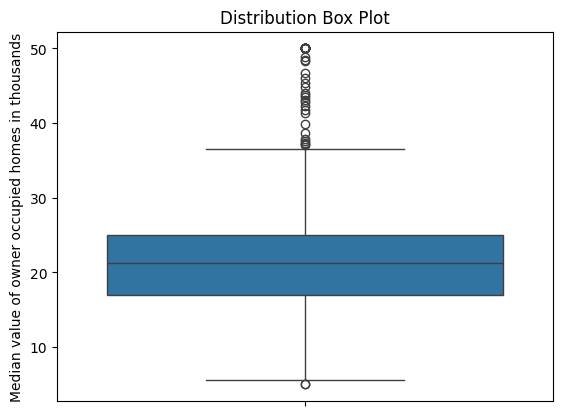

In [6]:
#boston_df['MEDV_1000'] = 1000 * boston_df['MEDV']
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Distribution Box Plot')
ax.set_ylabel('Median value of owner occupied homes in thousands')


### Bar plot for the Charles river variable

Text(0, 0.5, 'Count')

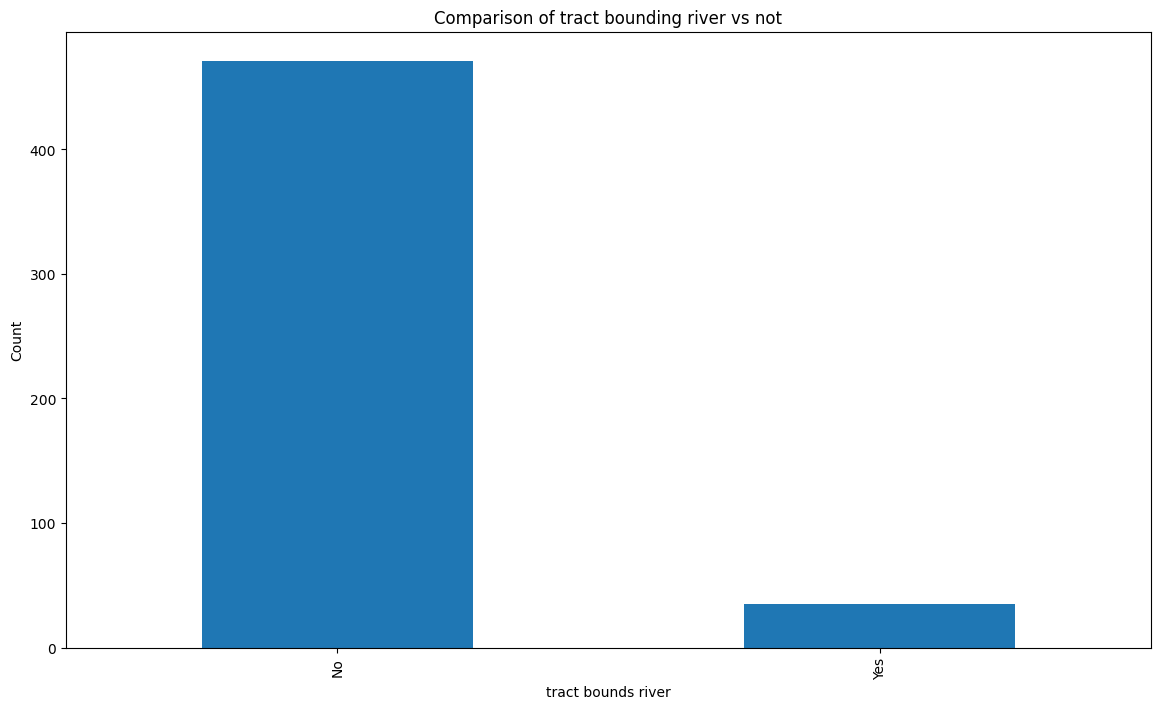

In [7]:
import numpy as np

boston_df['CHASTXT'] = np.where(boston_df.CHAS == 1,'Yes', 'No')

ax = boston_df['CHASTXT'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Comparison of tract bounding river vs not")
ax.set_xlabel("tract bounds river")
ax.set_ylabel("Count")


### Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


Text(0, 0.5, 'Median Value of Owner Occupied Homes')

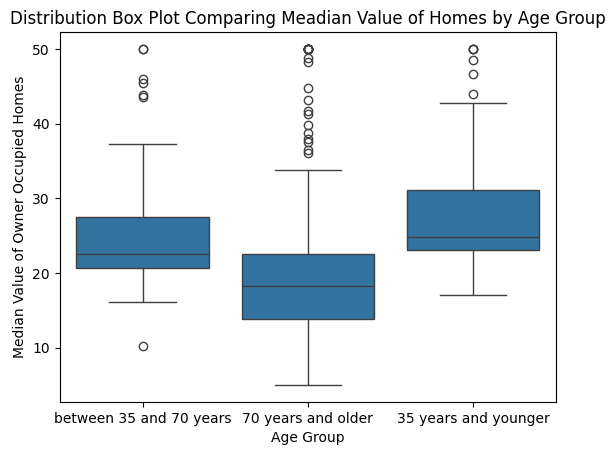

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


ax = sns.boxplot(x ='age_group', y='MEDV', data=boston_df)
ax.set_title('Distribution Box Plot Comparing Meadian Value of Homes by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Value of Owner Occupied Homes')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')



####  Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. There appears to be an association between Nitric oxide concentrations and the proportion of non-retail business acres per town





Text(0, 0.5, 'Proportion of non-retail business acres per town')

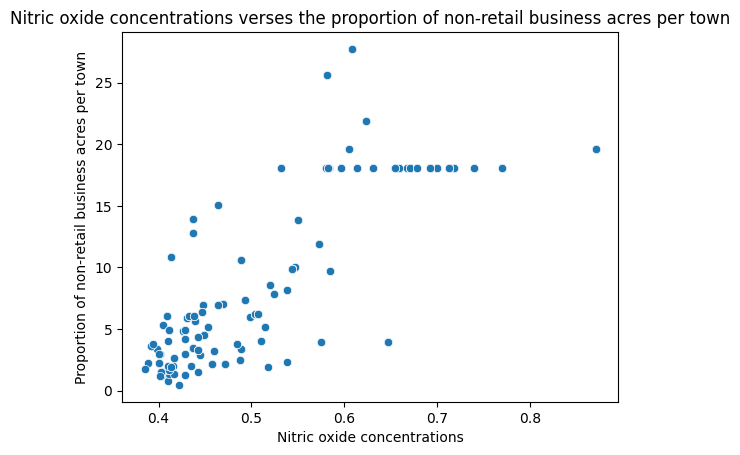

In [10]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Nitric oxide concentrations verses the proportion of non-retail business acres per town')
ax.set_xlabel('Nitric oxide concentrations')
ax.set_ylabel('Proportion of non-retail business acres per town')

#### Histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of pupil to teacher ratio')

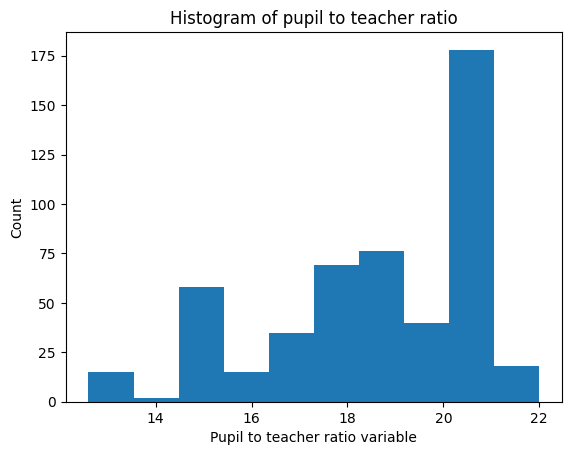

In [11]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil to teacher ratio variable')
pyplot.ylabel('Count')
pyplot.title('Histogram of pupil to teacher ratio')

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### Using α = 0.05

##### Hypothesis:

##### H0: µ1 = µ2 ("there is no difference in median value of houses bounded by the Charles river or not")

##### H1: µ1 not equal µ2 ("there is a difference in median value of houses bounded by the Charles river or not")


In [12]:
scipy.stats.levene(boston_df[boston_df['CHASTXT'] == 'Yes']['MEDV'],
                   boston_df[boston_df['CHASTXT'] == 'No']['MEDV'], center='mean')

#Since the p-value is greater than 0.05 we can assume equality of variance

scipy.stats.ttest_ind(boston_df[boston_df['CHASTXT'] == 'Yes']['MEDV'],
                   boston_df[boston_df['CHASTXT'] == 'No']['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

### Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river verses not

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##### Using α = 0.05
##### Hypothesis:
##### H0: µ1 = µ2= µ3 (the three population means are equal)
##### H1: At least one of the means differ


In [24]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means of median values of houses by age groups differ


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##### Using α = 0.05
##### Hypothesis:
##### H0: Nitric oxide concentrations and proportion of non-retail business acres per town are not correlated
##### H1: Nitric oxide concentrations and proportion of non-retail business acres per town are correlated



In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### Conclusion: No. We conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:14:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-square is 0.062, correlation coefficient is 0.25. There is a moderately weak positive correlation between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
